Nama Mahasiswa    : Nicholaus Verdhy Putranto

Asal Universitas  : Universitas Dian Nuswwantoro Semarang

Kode Peserta      : PYTN - KS11 - 023

# Import Library

Disini Kita membutuhkan beberapa library, diantaranya numpy , pandas, matplotlib, dan matplotlib.pyplot

## Kegunaan Dari Library Untuk Visualisasi Assigment 1
>1. Numpy : Menghasilkan array data n-dimensi dari berbagai format data untuk memproses data, menyiapkan data, memanipulasi data dan untuk memberikan nilai kedalam grafik


>2. Pandas : Digunakan untuk membersihkan data dan formating data, memgfilter data, memanggil data csv atau sejenisanya yang nantinya bisa kita gunakan untuk membuat grafik


>3. Matplotlib : Digunakan untuk membuat plot, meneyesuaikan plot, membuat subplot, menyimpan plot, dan membuat visualisasi yang kompleks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import folium

# Data Understanding

> Untuk mengawalinya, kita lakukan yang namanya Data Understanding. Data Understanding adalah tahap awal dalam proses analisis data yang melibatkan memahami dan menggali informasi dari data yang diperoleh.

## Data Collection 

> Kita menggunakan data berjudul london Crime DAta 2008-2016 yang terdapat pada kaggle

> Sumber data :  https://www.kaggle.com/datasets/jboysen/london-crime

> Kita panggil data lsoa_crime_by_lsoa.csv dengan fungsi pustaka pandas yaitu pd.read_csv

In [3]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


## Data Exploration

> melakukan eksplorasi data, yang meliputi memeriksa jumlah data, tipe data, dan statistika

### Melihat jumlah data yang ada 

> Mari kita lihat data frame yang sudah kita buat dan kita lihat ukurannya datanya dengan menggunakan .shape

In [4]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [5]:
df.shape

(13490604, 7)

> Data diatas memiliki ukuran (13.490.604 rows × 7 columns)

> Penjelasan Menegai Kolom data diatas :
> - lsoa_code           : mewakili area kepolisian
> - borough             : borough london yang terkait dengan statistik
> - major_category      : kategori kejahatan besar
> - minor_category      : kategori kejahatan ringan
> - value               : hitungan kejahatan untuk wilayah tertentu, pada bulan tertentu
> - year                : tahun ringkasan statistik
>- month               : bulan statistik ringkasan

### Melihat tipe data

> Untuk mengenali data kita lebih lanjut, kita gunakan .info() untuk melihat tipe datanya

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


> Dari data diatas, terdiri dari 2 tipe data. Yaitu Object dan int64

> Object itu string, dan int64 numerik.

> object : lsoa_code, borough, major_category, minor_category

> int64  : value, year, month

### Melihat beberapa data 

> Dikarenakan jumlah datanya sangatlah banyak barisnya, mari kita panggil dengan fungsi head(), dan tail () untuk melihat 5 data teratas dan 5 data terbawah

In [7]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


### Melihat Statistika 

> Mari kita lihat ringkasan dan deskripsi tentang data yang kita punya

In [9]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


> Dari data diatas, hanya tipe data int saja yang diproses

> Kita bisa melihat nilai tengah, standart deviasi, nilai min, 25%, 50%, 75, dan nilai max pada data yang ada di setiap kolomnya



# Data Cleansing

## Pengecekan MIssing Value

> Setelah melakukan pemahaman data diatas, mari kita melakukan pengecekan Missing value pada data diatas.

> Karena jumlah data yang sangatlah banyak, kita gunakan isna() untuk melakukan  penghitungan missing value, dan sum() untuk melakukan penghitungan missing value setiap kolomnya

> Dampak dari missing value bisa membuat plot yang kita buat tidak lengkap, kelsahan interpretasi yang mengakibatkan salah mengambil kesimpulan

In [10]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

> Dari data kolom yang diatas, bisa kita lihat data data tersebut tidak mengandung missing value sama sekali. 

## Pengecekan data yang duplikat

> Setelah pengecekan missing value, kita melkukan pengecekan pada data yang dobel/ terduplikat.

> Dampak dari duplikat data pun sama seperti missing value

> kita gunakan duplicate() untuk megecek duplikasi data, dan .sum() untuk jumlah data yang ada duplikatnya

In [11]:
df.duplicated().sum()

0

> Tidak ada data yang dpulikat

> Setelah selesai, data sudah siap untuk dipreprosesing

# PreProcessing Data 

> Untuk tahap ini mari kita lihat, mana kolom yang kita butuh kan dan tidak. 

In [12]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


> Sepertinya kita tidak membutuhkan lso_code untuk visualisasi data kali ini, Mari kita hapus saja

## Menghapus kolom yang tidak dibutuhkan 

> kita gunakan .drop, axis = 1, inplace=True

In [13]:
df.drop(['lsoa_code'], axis=1, inplace=True)

> df.drop(['lsoa_code'], axis=1, inplace=True) 

> .drop digunakan untuk menghapus kolomnya

> axis=1 digunakan untuk menandakan bawah kolom itu akan dihapus

> inplace = True digunakan untuk melakukan perbuhan secara permanen

In [14]:
df

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


## Mengubah nama kolom 

> Karena dirasa ada beberapa nama kolom yang riskan. Mari kita ubah nama borough menjadi area, dan value mennjadi count. Value menjadi count diuah, dikarenakan ada fungsi juga yang menggunakan .value

In [15]:
df.rename(columns={'borough': 'area','value':'counted'}, inplace=True)

In [16]:
df

,area,major_category,minor_category,counted,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


> dirasa data sudah diap, mari kita masuk ke visualisasi

# Data dan Visualisasi

## Hipotesis 

Di penugasan ini, saya akan mengambil "Visualisasi Top 5 *Major Category* di London"

Kasus yang saya angkat adalah :
1. Bagaimana 5  Tingkat kejahat besar setiap tahunnya dari 2008-2016? meningkat atau menurun.

2. Daerah mana sajakah yang mempunyai nilai kriminalitas tertingi pada tahun 2016?

3. Melihat Frekuensi Tingkat kejahatan yang muncul setiap tahunnya

4. Bisa mengambil keputusan untuk tahun 2017, daerah mana dan kategori kejahatan apa yang perlu ditekan 

> Mari kita lihat 5 kejahatan terbesar di London berdasarkan angka kriminalnya dari tahun 2008 hingga 2016

## Mengambil kolom yang diperlukan

In [17]:
df['major_category'].value_counts().head(5)

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Name: major_category, dtype: int64

> Mari Kita lihat jumlah angka kriminal pada major category berdsarakan setiap tahunnya

>  mari kita mengelompokkan data pada kolom major_category dan year pada dataframe df yang memiliki tahun lebih besar dari 2007

> Kita gunakan condioton pada dataframe dan grouyp by untuk dmelakukan pengelompokan data

> Lalu jumlah dari masing masing major kategori kita jumlahkan dengan sum

In [18]:
major_cat = df[(df['year'] > 2007)].groupby(['major_category','year'])['counted'].sum()
major_cat

major_category               year
Burglary                     2008     88092
                             2009     90619
                             2010     86826
                             2011     93315
                             2012     93392
                                      ...  
Violence Against the Person  2012    150014
                             2013    146181
                             2014    185349
                             2015    218740
                             2016    232381
Name: counted, Length: 81, dtype: int64

## Mari kita kelompokan data data tersebut berdasarkan nama dari kategori Major_category 

>Kita gunakan variable tah untuk menampung tahun dan Tehft and handling yang nantinya akan kita gunakan untuk menjadi data frame baru

In [19]:
tah = major_cat['Theft and Handling']
tah

year
2008    283692
2009    279492
2010    290924
2011    309292
2012    334054
2013    306372
2014    279880
2015    284022
2016    294133
Name: counted, dtype: int64

>Kita gunakan variable violence untuk menampung tahun dan Violence Againts the Person yang nantinya akan kita gunakan untuk menjadi data frame baru

In [20]:
violence = major_cat['Violence Against the Person']
violence

year
2008    159844
2009    160777
2010    157894
2011    146901
2012    150014
2013    146181
2014    185349
2015    218740
2016    232381
Name: counted, dtype: int64

>Kita gunakan variable cd untuk menampung tahun dan Criminal damage yang nantinya akan kita gunakan untuk menjadi data frame baru

In [21]:
cd = major_cat['Criminal Damage']
cd

year
2008    91872
2009    85565
2010    77897
2011    70914
2012    62158
2013    56206
2014    59279
2015    62976
2016    64071
Name: counted, dtype: int64

>Kita gunakan variable drg untuk menampung tahun dan drugs yang nantinya akan kita gunakan untuk menjadi data frame baru

In [22]:
drg = major_cat['Drugs']
drg

year
2008    68804
2009    60549
2010    58674
2011    57550
2012    51776
2013    50278
2014    44435
2015    39785
2016    38914
Name: counted, dtype: int64

>Kita gunakan variable blg untuk menampung tahun dan burglary yang nantinya akan kita gunakan untuk menjadi data frame baru

In [23]:
blg = major_cat['Burglary']
blg

year
2008    88092
2009    90619
2010    86826
2011    93315
2012    93392
2013    87222
2014    76053
2015    70489
2016    68285
Name: counted, dtype: int64

## Konvert Jadi DataFrame 

> Setelah data kita kelompokkan berdsarakan major_kategorynya, mari kita ubah kedalam bentuk dataFrame.

> Tak lupa juga kita mengubah *counted* menjadi nama major_category

> 1. Kita gunakan to.frame untuk mengubah data menjadi dataFrame
> 2. Lalu kita rename kolomnya counted menjadi nama dari major_category nya
> 3. gunakan inplce = True untuk melakukan perubahan se4cara permanen
> 4. gunakan juga index.name = None untuk menghapus kolom yang tidak ada nilainya yang diakibatkan konvert dataFrame

In [24]:
dftah = tah.to_frame()
dftah.rename(columns={'counted': 'Theft and Handling'}, inplace=True)
dftah.index.name=None
dftah

,Theft and Handling
2008,283692
2009,279492
2010,290924
2011,309292
2012,334054
2013,306372
2014,279880
2015,284022
2016,294133


In [25]:
dfviolence = violence.to_frame()
dfviolence.rename(columns={'counted': 'Violence Against the Person'}, inplace=True)
dftah.index.name=None
dfviolence

,Violence Against the Person
year,
2008,159844
2009,160777
2010,157894
2011,146901
2012,150014
2013,146181
2014,185349
2015,218740
2016,232381


In [26]:
dfcd = cd.to_frame()
dfcd.rename(columns={'counted': 'Criminal Damage'}, inplace=True)
dftah.index.name=None
dfcd

,Criminal Damage
year,
2008,91872
2009,85565
2010,77897
2011,70914
2012,62158
2013,56206
2014,59279
2015,62976
2016,64071


In [27]:
dfdrg = drg.to_frame()
dfdrg.rename(columns={'counted': 'Drugs'}, inplace=True)
dfdrg.index.name=None
dfdrg

,Drugs
2008,68804
2009,60549
2010,58674
2011,57550
2012,51776
2013,50278
2014,44435
2015,39785
2016,38914


In [28]:
dfblg = blg.to_frame()
dfblg.rename(columns={'counted': 'Burglary'}, inplace=True)
dftah.index.name=None
dfblg

,Burglary
year,
2008,88092
2009,90619
2010,86826
2011,93315
2012,93392
2013,87222
2014,76053
2015,70489
2016,68285


## Menggabungkan DataFrame 

> Setelah kita mengubah semua menjadi dataFrame, mari kita gabungkan lagi menjadi satu data yang akan kita pakai dalam visualisasi nantinya. Kita gunakan concat untuk menyatukan beberapa dataframe, dan axis =1 karena letaknya ada di kolom. Kita beri nama vaeiabalenya df_top5

In [29]:
df_top5 = pd.concat([dftah,dfviolence,dfcd,dfdrg,dfblg], axis=1)
df_top5

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,283692,159844,91872,68804,88092
2009,279492,160777,85565,60549,90619
2010,290924,157894,77897,58674,86826
2011,309292,146901,70914,57550,93315
2012,334054,150014,62158,51776,93392
2013,306372,146181,56206,50278,87222
2014,279880,185349,59279,44435,76053
2015,284022,218740,62976,39785,70489
2016,294133,232381,64071,38914,68285


> Bisa kita lihat sekarang, index atau baris dari data diatas adalah urutan tahun dari 2008 sampai 2017. Dan untuk isi dari kolomnya adalah jumlah tingkat kriminalitas pe tahunnya yang ada.

## Bagaimana 5 Tingkat kejahat besar setiap tahunnya dari 2008-2016? meningkat atau menurun?

> Pertama - tama, mari kita lihat Bagaimana 5 Tingkat kejahat besar setiap tahunnya dari 2008-2016? meningkat atau menurun.

### Line Plot 

> MAri kita gunakan line plot dengan .plot()

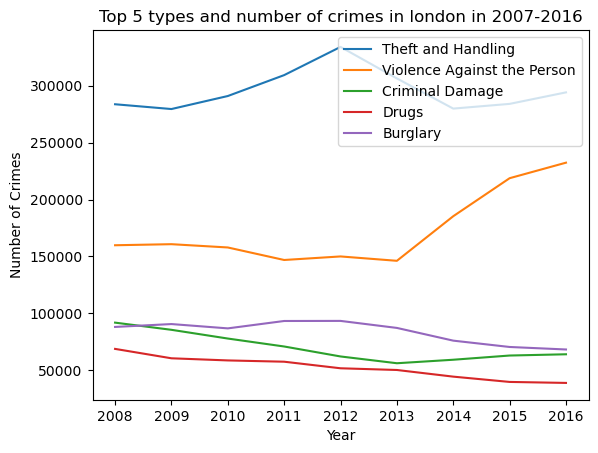

In [30]:
df_top5.plot() # memanggil plot line
plt.rcParams['figure.figsize'] = [12,10] #mengubah ukuran canvas plot line
plt.xlabel('Year') #menyeting label x
plt.ylabel('Number of Crimes') #menyeting label y
plt.title('Top 5 types and number of crimes in london in 2007-2016') #judul plot line
plt.show() #menampilkan 

*Keterangan dari LinePLot*

1. Menduduki tingkat pertama untuk jumlah kasus, untuk kejahatan besar *Theft and Handling* sudah sangat tinggi dimulai pada tahun 2008 diangka 283.692 . Lalu mengamlami penurunan sedikit pada tahun 2009. Setelah tahun 2009 *Theft and Handling* mengalami peningkatan dari 2009 hinggi 2012. Tahun 2012 adalah puncak tertinggi. Lalu menglami penurunan signifikan pada tahun 2012 menuju 2014, dan ahkirnya mengalami peningkatan hingga tahun 2016


2. Menduduki tingkat kedua untuk jumlah kasus, untuk kejahatan besar *Violence Againts the Person* dimulai pada tahun 2008 diangka 159.844. Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan hingga tahun 2011. Mengalami peningkatan kembali dari 2011 - 2012 , akan tetapi tidak terlalu signifikan. Mengalami penurunan pada tahun 2013. Saat 2013, mengalami peningkatan yang sangat signifikan hingga 2016 dari ksiaran 218.740  hingga 232.381  kasus.


3. Menduduki tingkat ketiga untuk jumlah kasus, untuk kejahatan besar *Bulglary* dimulai pada tahun 2008 diangka 88.092 . Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan sedikit pada tahun 2010. Pada tahun 2011 mengalami penigkatan ke tahun 2011, dan mengalami penurunan hingga tahun 2016


4. Menduduki tingkat keempat untuk jumlah kasus, untuk kejahatan besar *Criminal Damage* dimulai pada tahun 2008 diangka 91.872. Lalu mengalami penurunan dari 2008 - 2013.Lalu 2013 - 2016 mengalami kenaikan tetapi tidak terlalu signifikan


5. Menduduki tingkat kelima untuk jumlah kasus, untuk kejahatan besar *Drugs* dimulai pada tahun 2008 diangka 68.804 . Lalu mengalami penurunan tahun 2009-2010, dan naik turun di tahun 2011-2013. Dan turun drastis 2013-2016

### BarChart

#### Membuat BarChart Secara Vertikal

> Sekarang kita akan memvisualisasikan menggunakan BarChart

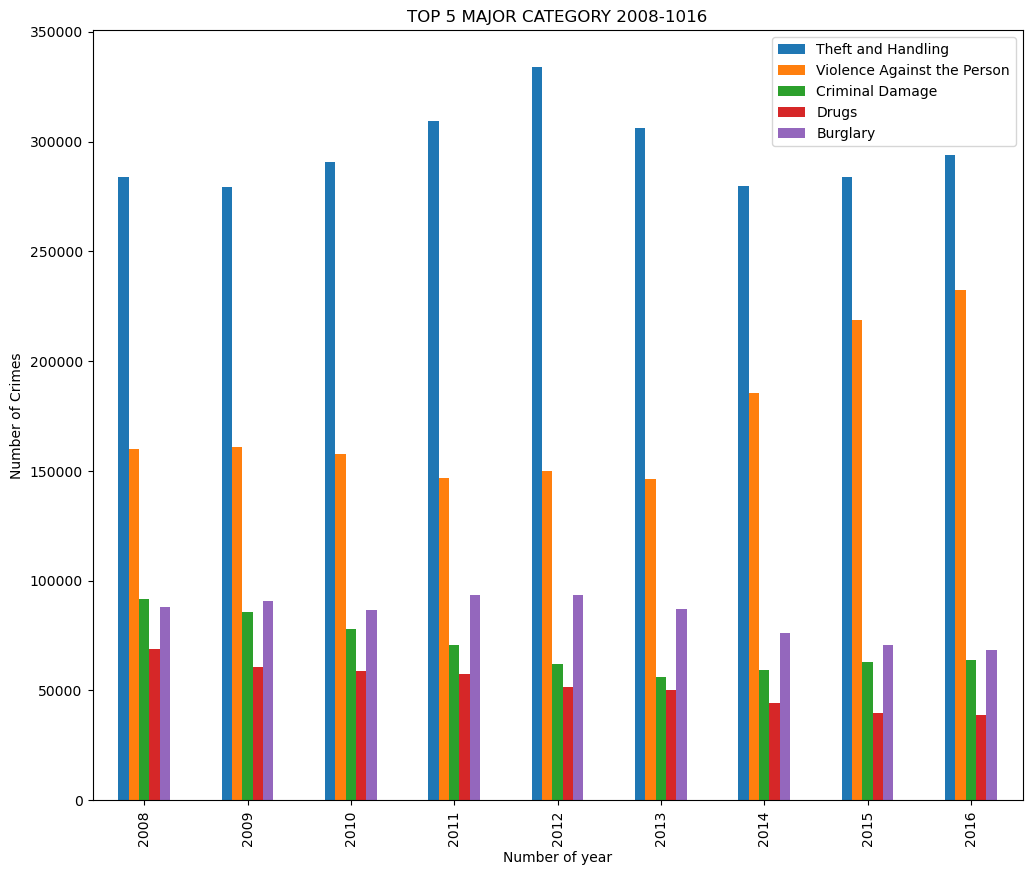

In [31]:
df_top5.plot(kind='bar') #jenis dari bar
plt.title('TOP 5 MAJOR CATEGORY 2008-1016') #judul
plt.ylabel('Number of Crimes') #ylabel
plt.xlabel('Number of year') #xlabel
plt.show() #tampilkan

#### Membuat Bar Chart Horizontal

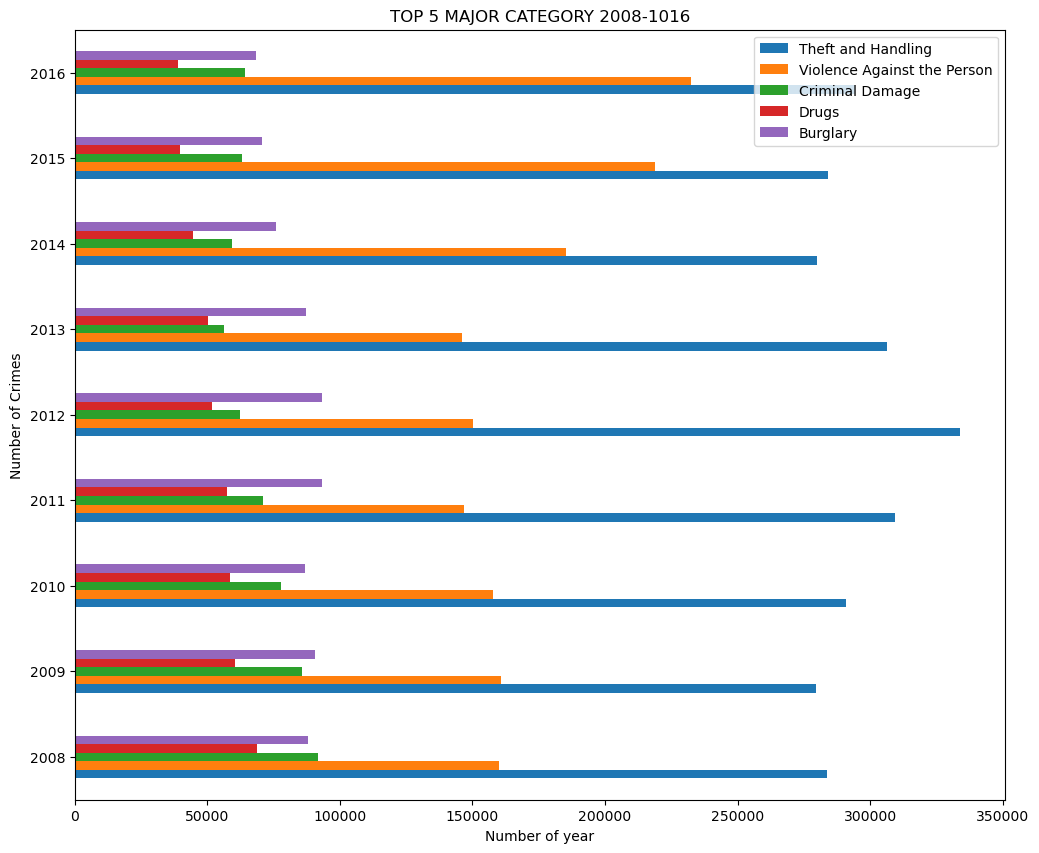

In [32]:
df_top5.plot(kind='barh') #barchart horizontal
plt.title('TOP 5 MAJOR CATEGORY 2008-1016') #judul chart
plt.ylabel('Number of Crimes') # nema label y
plt.xlabel('Number of year') #nama label x
plt.show() #menampilkan

*Keterangan dari BarChart*

1. Menduduki tingkat pertama untuk jumlah kasus, untuk kejahatan besar *Theft and Handling* sudah sangat tinggi dimulai pada tahun 2008 diangka 283.692 . Lalu mengamlami penurunan sedikit pada tahun 2009. Setelah tahun 2009 *Theft and Handling* mengalami peningkatan dari 2009 hinggi 2012. Tahun 2012 adalah puncak tertinggi. Lalu menglami penurunan signifikan pada tahun 2012 menuju 2014, dan ahkirnya mengalami peningkatan hingga tahun 2016


2. Menduduki tingkat kedua untuk jumlah kasus, untuk kejahatan besar *Violence Againts the Person* dimulai pada tahun 2008 diangka 159.844. Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan hingga tahun 2011. Mengalami peningkatan kembali dari 2011 - 2012 , akan tetapi tidak terlalu signifikan. Mengalami penurunan pada tahun 2013. Saat 2013, mengalami peningkatan yang sangat signifikan hingga 2016 dari ksiaran 218.740  hingga 232.381  kasus.


3. Menduduki tingkat ketiga untuk jumlah kasus, untuk kejahatan besar *Bulglary* dimulai pada tahun 2008 diangka 88.092 . Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan sedikit pada tahun 2010. Pada tahun 2011 mengalami penigkatan ke tahun 2011, dan mengalami penurunan hingga tahun 2016


4. Menduduki tingkat keempat untuk jumlah kasus, untuk kejahatan besar *Criminal Damage* dimulai pada tahun 2008 diangka 91.872. Lalu mengalami penurunan dari 2008 - 2013.Lalu 2013 - 2016 mengalami kenaikan tetapi tidak terlalu signifikan


5. Menduduki tingkat kelima untuk jumlah kasus, untuk kejahatan besar *Drugs* dimulai pada tahun 2008 diangka 68.804 . Lalu mengalami penurunan tahun 2009-2010, dan naik turun di tahun 2011-2013. Dan turun drastis 2013-2016

### Area Plot 

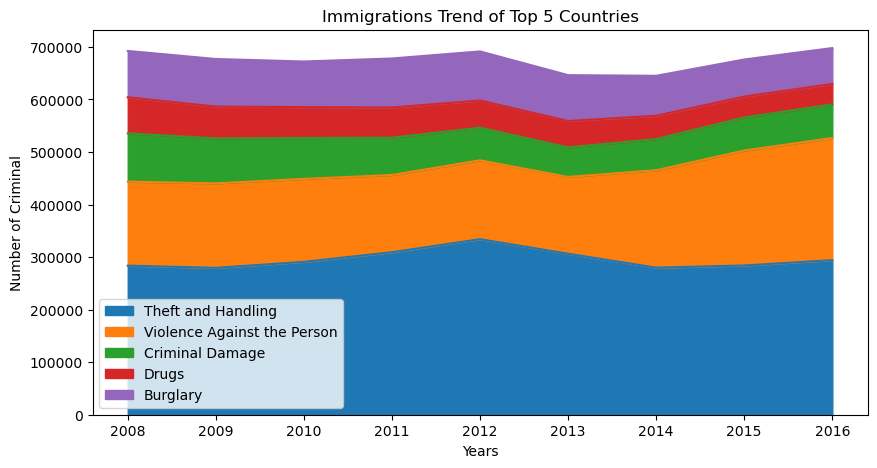

In [33]:
# area plot 
df_top5.plot(kind='area', figsize=(10,5)) #jenis area plot
plt.title("Immigrations Trend of Top 5 Countries") #judul
plt.ylabel('Number of Criminal') #y label
plt.xlabel('Years')# x label
plt.show() #menampilkan

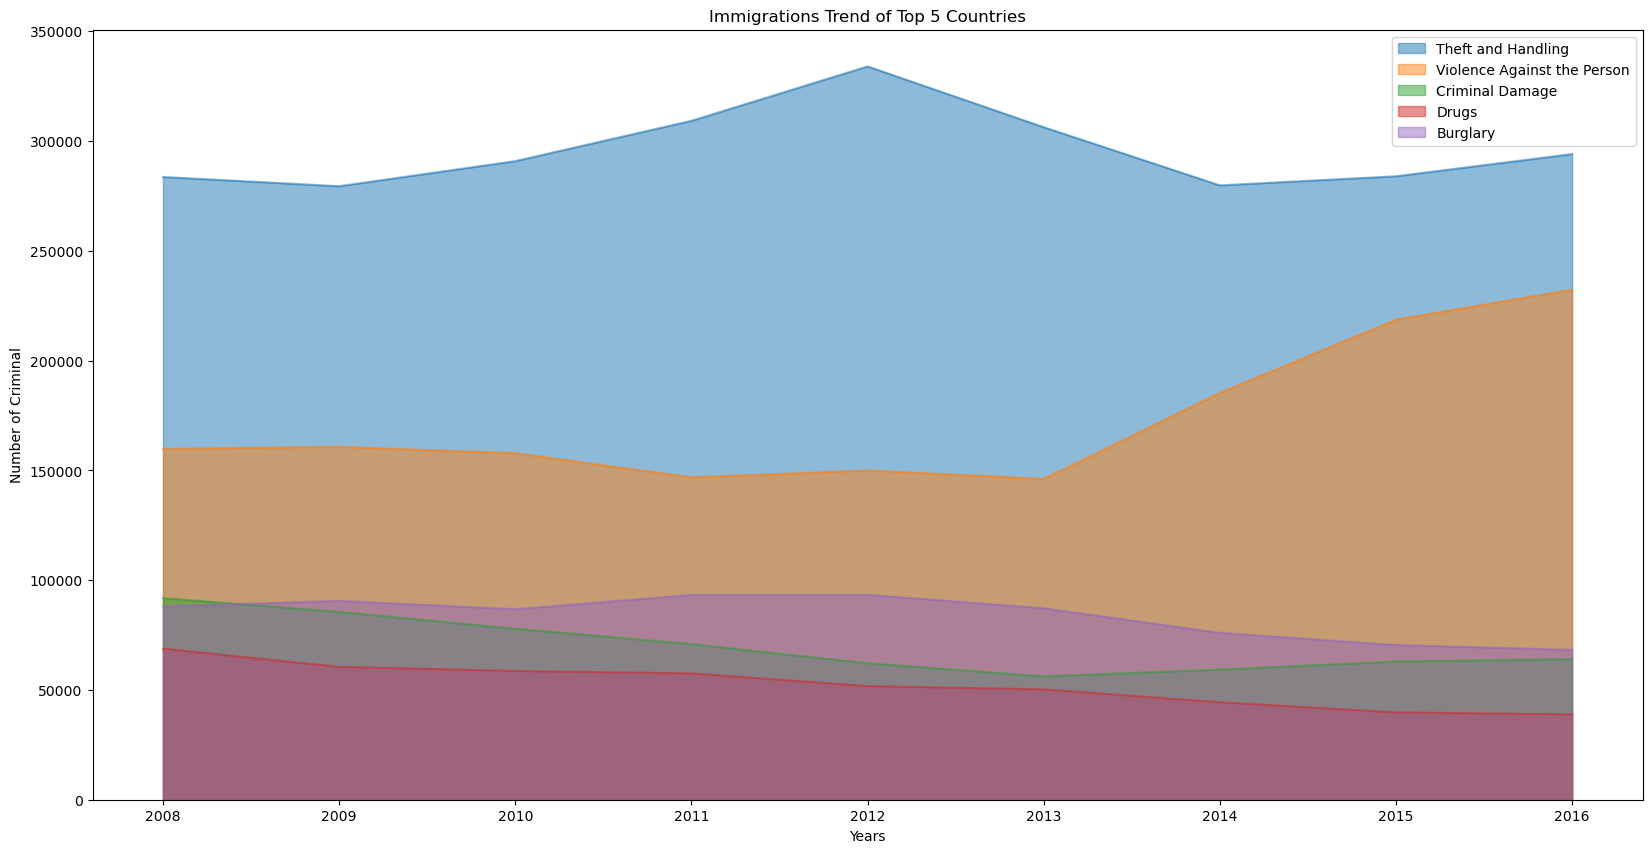

In [34]:
#area plot dengan artisan layer
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind='area',
            stacked=False,
            figsize=(20,10)
            )

plt.title("Immigrations Trend of Top 5 Countries")
plt.ylabel('Number of Criminal')
plt.xlabel('Years')

plt.show()

*Keterangan dari Area Plot*

1. Menduduki tingkat pertama untuk jumlah kasus, untuk kejahatan besar *Theft and Handling* sudah sangat tinggi dimulai pada tahun 2008 diangka 283.692 . Lalu mengamlami penurunan sedikit pada tahun 2009. Setelah tahun 2009 *Theft and Handling* mengalami peningkatan dari 2009 hinggi 2012. Tahun 2012 adalah puncak tertinggi. Lalu menglami penurunan signifikan pada tahun 2012 menuju 2014, dan ahkirnya mengalami peningkatan hingga tahun 2016


2. Menduduki tingkat kedua untuk jumlah kasus, untuk kejahatan besar *Violence Againts the Person* dimulai pada tahun 2008 diangka 159.844. Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan hingga tahun 2011. Mengalami peningkatan kembali dari 2011 - 2012 , akan tetapi tidak terlalu signifikan. Mengalami penurunan pada tahun 2013. Saat 2013, mengalami peningkatan yang sangat signifikan hingga 2016 dari ksiaran 218.740  hingga 232.381  kasus.


3. Menduduki tingkat ketiga untuk jumlah kasus, untuk kejahatan besar *Bulglary* dimulai pada tahun 2008 diangka 88.092 . Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan sedikit pada tahun 2010. Pada tahun 2011 mengalami penigkatan ke tahun 2011, dan mengalami penurunan hingga tahun 2016


4. Menduduki tingkat keempat untuk jumlah kasus, untuk kejahatan besar *Criminal Damage* dimulai pada tahun 2008 diangka 91.872. Lalu mengalami penurunan dari 2008 - 2013.Lalu 2013 - 2016 mengalami kenaikan tetapi tidak terlalu signifikan


5. Menduduki tingkat kelima untuk jumlah kasus, untuk kejahatan besar *Drugs* dimulai pada tahun 2008 diangka 68.804 . Lalu mengalami penurunan tahun 2009-2010, dan naik turun di tahun 2011-2013. Dan turun drastis 2013-2016

### Word Clouds Major Category

> Sekarang kita akan menampilkan major_category dengan Word Clouds yang akan menunjukan seberapa sering kasus muncul

In [35]:
# kata yang ada pada kolom area
stopwords = list(df['major_category'])
stopwords

['Burglary',
 'Violence Against the Person',
 'Violence Against the Person',
 'Burglary',
 'Robbery',
 'Theft and Handling',
 'Violence Against the Person',
 'Robbery',
 'Criminal Damage',
 'Theft and Handling',
 'Theft and Handling',
 'Violence Against the Person',
 'Robbery',
 'Violence Against the Person',
 'Theft and Handling',
 'Violence Against the Person',
 'Theft and Handling',
 'Violence Against the Person',
 'Theft and Handling',
 'Drugs',
 'Violence Against the Person',
 'Theft and Handling',
 'Criminal Damage',
 'Drugs',
 'Theft and Handling',
 'Violence Against the Person',
 'Theft and Handling',
 'Violence Against the Person',
 'Violence Against the Person',
 'Violence Against the Person',
 'Burglary',
 'Criminal Damage',
 'Criminal Damage',
 'Violence Against the Person',
 'Violence Against the Person',
 'Theft and Handling',
 'Criminal Damage',
 'Criminal Damage',
 'Theft and Handling',
 'Drugs',
 'Fraud or Forgery',
 'Violence Against the Person',
 'Drugs',
 'Theft and

In [36]:
text = ' '.join(df['major_category'].astype(str).tolist()) #menggabungkan anatara " " dengan major_category dan mengubah tipedata menjadi string dan list

In [37]:
mC = WordCloud(width=800, height=800, background_color='white', 
               min_font_size=10).generate(text) #melakukan penyetingan text

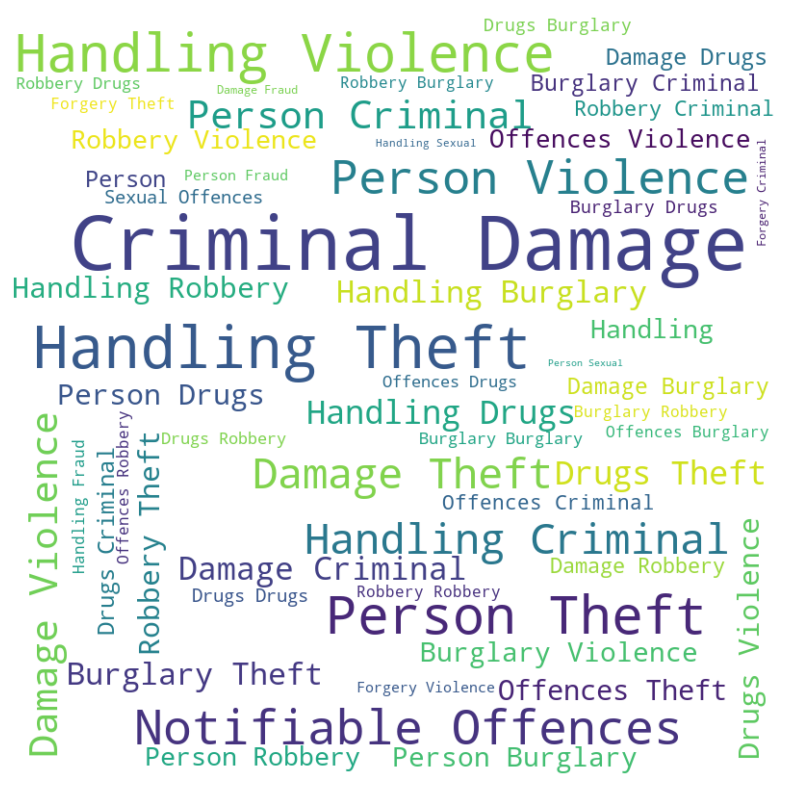

In [38]:
# wilayah yang sering muncul pada kolom area
fig=plt.figure(figsize=(10,10))
plt.imshow(mC, interpolation='bilinear')
plt.axis("off")
plt.show()

> Bisa kita lihat Criminal DAmage, Violence, Drugs, Theft , Burglary adalah kata kata yang sering munculk digambar, menandakan bahwa kasus kasus tersebut sering muncul/ terjadi

## Daerah mana sajakah yang mempunyai nilai 5 Kejahatan Besar tertingi pada tahun 2016?

> Sekarang mari kita lihat wilayah yang memiliki jumlah kasus terbanyak. mengambil berdasarkan tahun 2016, dan top 5 major_category  dan dikelompokan dengan area dan counted sebgai paramater letak dan jumlah angka kriminalnya

In [39]:
df_top5

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,283692,159844,91872,68804,88092
2009,279492,160777,85565,60549,90619
2010,290924,157894,77897,58674,86826
2011,309292,146901,70914,57550,93315
2012,334054,150014,62158,51776,93392
2013,306372,146181,56206,50278,87222
2014,279880,185349,59279,44435,76053
2015,284022,218740,62976,39785,70489
2016,294133,232381,64071,38914,68285


In [40]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Theft and Handling
area_TaH = (df[(df['year'] == 2016)&(df['major_category'] == 'Theft and Handling')].groupby('area')['counted'].sum())
area_TaH

area
Barking and Dagenham       5607
Barnet                     9731
Bexley                     4392
Brent                      9026
Bromley                    7584
Camden                    14088
City of London              129
Croydon                    9229
Ealing                    10040
Enfield                    8037
Greenwich                  8010
Hackney                   11851
Hammersmith and Fulham     8925
Haringey                  10554
Harrow                     4537
Havering                   5919
Hillingdon                 9045
Hounslow                   8682
Islington                 12077
Kensington and Chelsea     9855
Kingston upon Thames       3803
Lambeth                   13155
Lewisham                   7702
Merton                     4894
Newham                    11964
Redbridge                  7447
Richmond upon Thames       4769
Southwark                 12946
Sutton                     3516
Tower Hamlets             10953
Waltham Forest             7357
Wan

In [41]:
area_TaH.to_frame()
df_sorted_area_TaH = area_TaH.sort_values(ascending=False).head(5)
df_sorted_area_TaH

area
Westminster    27520
Camden         14088
Lambeth        13155
Southwark      12946
Islington      12077
Name: counted, dtype: int64

In [42]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Violence Against the Person
area_violence = (df[(df['year'] == 2016)&(df['major_category'] == 'Violence Against the Person')].groupby('area')['counted'].sum())
area_violence

area
Barking and Dagenham       6067
Barnet                     7499
Bexley                     4503
Brent                      9205
Bromley                    6650
Camden                     7626
City of London               25
Croydon                   10302
Ealing                     9396
Enfield                    7409
Greenwich                  8590
Hackney                    8832
Hammersmith and Fulham     6118
Haringey                   8574
Harrow                     4293
Havering                   5936
Hillingdon                 7830
Hounslow                   7405
Islington                  7840
Kensington and Chelsea     4696
Kingston upon Thames       3194
Lambeth                   10496
Lewisham                   8809
Merton                     4026
Newham                     9646
Redbridge                  6411
Richmond upon Thames       3155
Southwark                  9474
Sutton                     3714
Tower Hamlets              9608
Waltham Forest             7409
Wan

In [43]:
area_violence.to_frame()
df_sorted_area_violence = area_violence.sort_values(ascending=False).head(5)
df_sorted_area_violence

area
Westminster      10834
Lambeth          10496
Croydon          10302
Newham            9646
Tower Hamlets     9608
Name: counted, dtype: int64

In [44]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Criminal Damage
area_criminalDamage = (df[(df['year'] == 2016)&(df['major_category'] == 'Criminal Damage')].groupby('area')['counted'].sum())
area_criminalDamage

area
Barking and Dagenham      1949
Barnet                    2183
Bexley                    1673
Brent                     2280
Bromley                   2202
Camden                    1935
City of London               2
Croydon                   3219
Ealing                    2562
Enfield                   2136
Greenwich                 2476
Hackney                   1981
Hammersmith and Fulham    1408
Haringey                  2233
Harrow                    1212
Havering                  1804
Hillingdon                2470
Hounslow                  2213
Islington                 1903
Kensington and Chelsea    1051
Kingston upon Thames      1054
Lambeth                   2764
Lewisham                  2351
Merton                    1418
Newham                    2496
Redbridge                 1650
Richmond upon Thames      1148
Southwark                 2621
Sutton                    1316
Tower Hamlets             2357
Waltham Forest            1989
Wandsworth                1836
Wes

In [45]:
area_criminalDamage.to_frame()
df_sorted_area_criminalDamage = area_criminalDamage.sort_values(ascending=False).head(5)
df_sorted_area_criminalDamage

area
Croydon      3219
Lambeth      2764
Southwark    2621
Ealing       2562
Newham       2496
Name: counted, dtype: int64

In [46]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Drugs
area_drugs = (df[(df['year'] == 2016)&(df['major_category'] == 'Drugs')].groupby('area')['counted'].sum())
area_drugs

area
Barking and Dagenham       919
Barnet                     906
Bexley                     646
Brent                     2096
Bromley                    728
Camden                    1493
City of London              10
Croydon                   1367
Ealing                    1355
Enfield                   1063
Greenwich                  867
Hackney                   1353
Hammersmith and Fulham    1321
Haringey                  1540
Harrow                     473
Havering                   718
Hillingdon                1042
Hounslow                  1086
Islington                 1777
Kensington and Chelsea    1680
Kingston upon Thames       743
Lambeth                   2738
Lewisham                  1617
Merton                     466
Newham                    1684
Redbridge                 1017
Richmond upon Thames       320
Southwark                 1838
Sutton                     461
Tower Hamlets             1629
Waltham Forest            1042
Wandsworth                 870
Wes

In [47]:
area_drugs.to_frame()
df_sorted_area_drugs = area_drugs.sort_values(ascending=False).head(5)
df_sorted_area_drugs

area
Lambeth        2738
Brent          2096
Westminster    2049
Southwark      1838
Islington      1777
Name: counted, dtype: int64

In [48]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Burglary
area_burglary = (df[(df['year'] == 2016)&(df['major_category'] == 'Burglary')].groupby('area')['counted'].sum())
area_burglary

area
Barking and Dagenham      1287
Barnet                    3402
Bexley                    1123
Brent                     2631
Bromley                   2214
Camden                    2652
City of London               2
Croydon                   2738
Ealing                    2492
Enfield                   2541
Greenwich                 1780
Hackney                   2719
Hammersmith and Fulham    1531
Haringey                  2474
Harrow                    1994
Havering                  1826
Hillingdon                2229
Hounslow                  1808
Islington                 2051
Kensington and Chelsea    1449
Kingston upon Thames       879
Lambeth                   3087
Lewisham                  2071
Merton                    1419
Newham                    2115
Redbridge                 1997
Richmond upon Thames      1359
Southwark                 2946
Sutton                    1233
Tower Hamlets             2794
Waltham Forest            1873
Wandsworth                2351
Wes

In [49]:
area_burglary.to_frame()
df_sorted_area_bulglary = area_burglary.sort_values(ascending=False).head(5)
df_sorted_area_bulglary

area
Barnet           3402
Westminster      3218
Lambeth          3087
Southwark        2946
Tower Hamlets    2794
Name: counted, dtype: int64

### Pie Chart 

> Setelah kita melakuakn filterisasi data kejahatan major di ttahun 2016 dan beserta daerahnya . Marika kita lakukan visualisasi dalam pie Chart

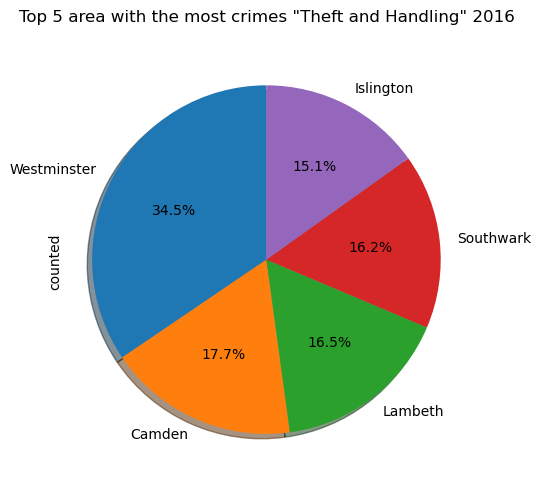

In [50]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_TaH.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most crimes "Theft and Handling" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 1*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Theft and handling* pada tahun 2016 adalah kota Westminster dengan persentase 34.5% (27.520 kasus)

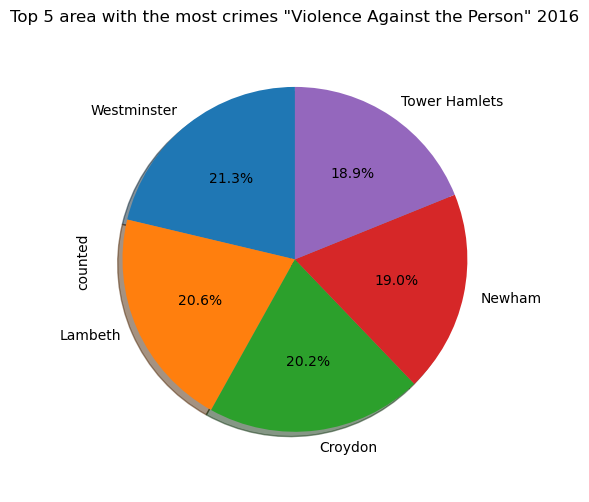

In [51]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_violence.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most crimes "Violence Against the Person" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 2*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Violence Against the Person* pada tahun 2016 adalah kota Westminster dengan persentase 21.3% (10.834 kasus)

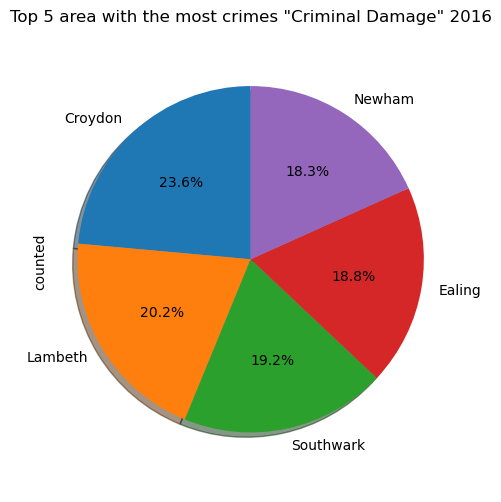

In [52]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_criminalDamage.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most crimes "Criminal Damage" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 3*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Criminal Damage* pada tahun 2016 adalah kota Croydon dengan persentase 23.6% (3.219 kasus)

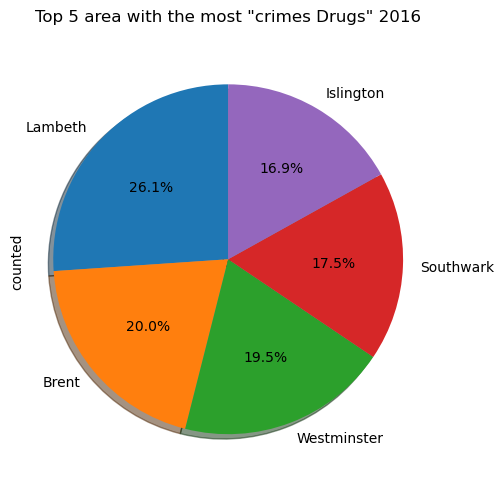

In [53]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_drugs.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most "crimes Drugs" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 4*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Drugs* pada tahun 2016 adalah kota Lambeth dengan persentase 26.1% (2.738 kasus)

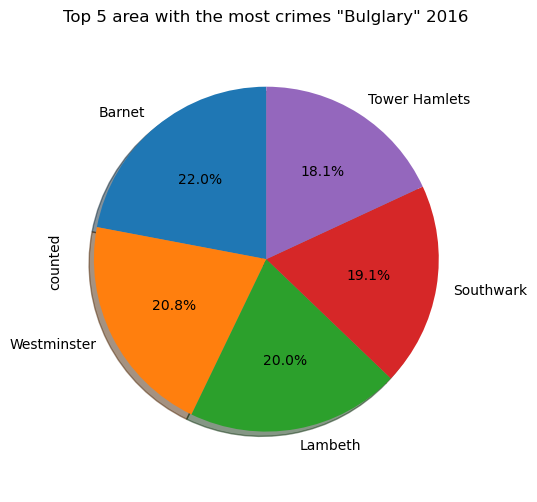

In [54]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_bulglary.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most crimes "Bulglary" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 5*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Burglary* pada tahun 2016 adalah kota Barnet dengan persentase 22.0% (3.402 kasus)

## Melihat Frekuensi munculnya kejahatan tiap tahunya

Sekarang mari kita lihat Frekuensi munculnya tingkat kejahatan besar dalam 2008-2016

### Histogram

Untuk membuat histogram, saya membuat variabel baru df_new_hist yang isinya adalah berapa banyak kejahatan itu muncul di setiap tahunnya

 Kita kunci untuk lokasinya dengn .loc()

In [55]:
df_new_hist = df_top5.loc[:,["Theft and Handling","Violence Against the Person","Criminal Damage","Drugs","Burglary"]]
df_new_hist

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,283692,159844,91872,68804,88092
2009,279492,160777,85565,60549,90619
2010,290924,157894,77897,58674,86826
2011,309292,146901,70914,57550,93315
2012,334054,150014,62158,51776,93392
2013,306372,146181,56206,50278,87222
2014,279880,185349,59279,44435,76053
2015,284022,218740,62976,39785,70489
2016,294133,232381,64071,38914,68285


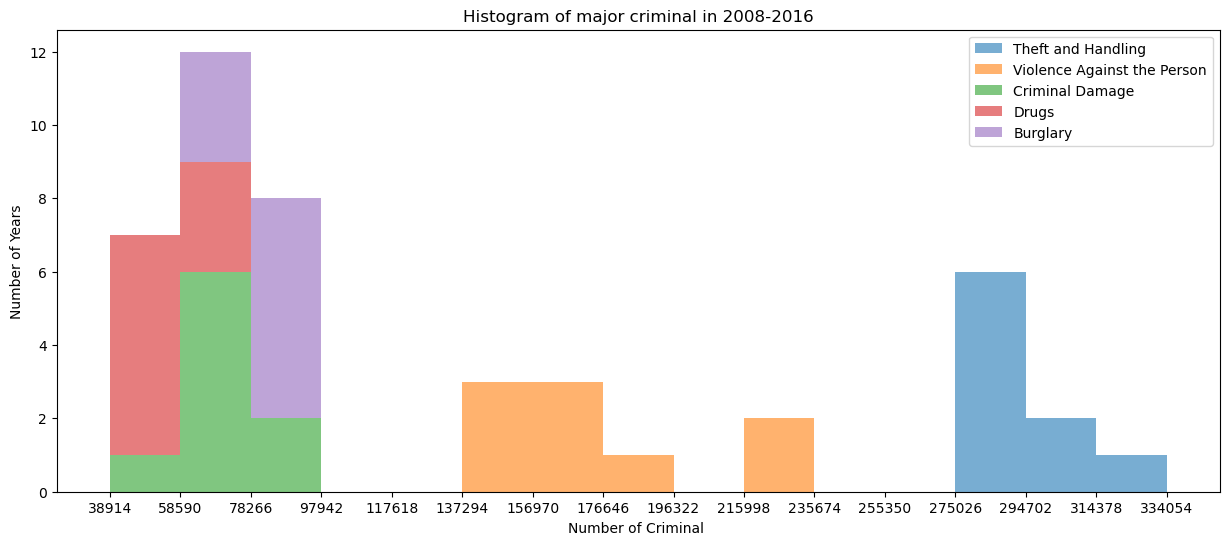

In [56]:
# membuat histogram jenis kejahatan yang terjadi di london pada tahun 2008-2016 berdasarkan major category
count, bin_edges = np.histogram(df_new_hist, 15)
df_new_hist.plot(kind='hist',
           figsize=(15, 6),
           bins=15,
           alpha=0.6,
           stacked=True,
           xticks=bin_edges
           )

plt.title('Histogram of major criminal in 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal ')

plt.show()

*Keterangan Histogram*

Dari data diatas, bisa kita lihat kejahatan Theft and Handling ini terjadi bebarapa kali dengan tingkat yang sangat tinggi tiap tahunnya dibanding dengan kejahatan lainnya. Theft and Handling menyentuh pada angaka 334054, dan sering terjadi berulang pada angka 275.026

### Box Plot

Sekarang mari kita lihat dalam bentuk box plot. Pertama kita gunakan describe untuk melihat  statistikanya dengan .describe()

In [57]:
df_top5.describe()

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,295762.333333,173120.111111,70104.222222,52307.222222,83810.333333
std,17987.611959,32113.207526,12424.545824,10066.338892,9658.166674
min,279492.000000,146181.000000,56206.000000,38914.000000,68285.000000
25%,283692.000000,150014.000000,62158.000000,44435.000000,76053.000000
50%,290924.000000,159844.000000,64071.000000,51776.000000,87222.000000
75%,306372.000000,185349.000000,77897.000000,58674.000000,90619.000000
max,334054.000000,232381.000000,91872.000000,68804.000000,93392.000000


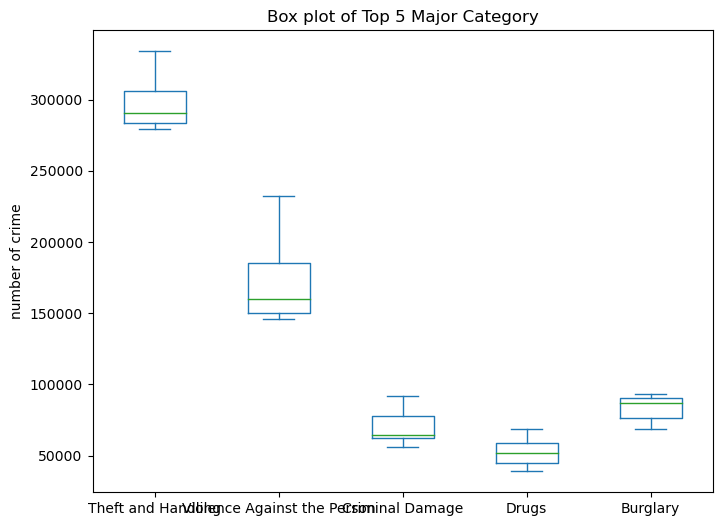

In [58]:
#membuat boxplot
df_top5.plot(kind='box', figsize=(8,6))
plt.title('Box plot of Top 5 Major Category')
plt.ylabel('number of crime')
plt.show()


Bisa kita lihat pada theft and handling dan Voilence againts the person terdapat pencilan atau outlier. Itu menandakan ada satu titik dimana angka tsbt/ data tersebut diluar dari pertumbuhan nya. 

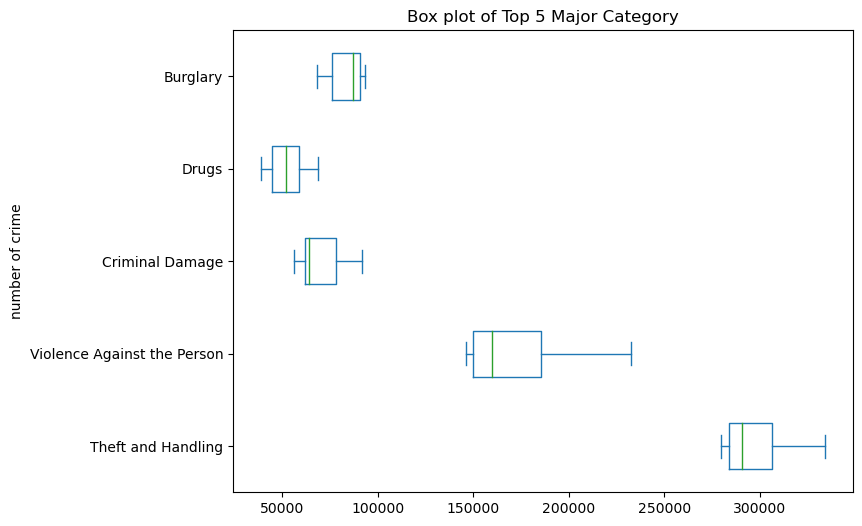

In [59]:
#mengubah boxplot menjadi horizontal
df_top5.plot(kind='box', figsize=(8,6), vert=False)
plt.title('Box plot of Top 5 Major Category')
plt.ylabel('number of crime')
plt.show()

###  Scatter

In [60]:
scatter_chart = df_new_hist.copy()

In [61]:
scatter_chart

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,283692,159844,91872,68804,88092
2009,279492,160777,85565,60549,90619
2010,290924,157894,77897,58674,86826
2011,309292,146901,70914,57550,93315
2012,334054,150014,62158,51776,93392
2013,306372,146181,56206,50278,87222
2014,279880,185349,59279,44435,76053
2015,284022,218740,62976,39785,70489
2016,294133,232381,64071,38914,68285


In [62]:
scater_plot = scatter_chart.reset_index()
scater_plot

,index,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
0,2008,283692,159844,91872,68804,88092
1,2009,279492,160777,85565,60549,90619
2,2010,290924,157894,77897,58674,86826
3,2011,309292,146901,70914,57550,93315
4,2012,334054,150014,62158,51776,93392
5,2013,306372,146181,56206,50278,87222
6,2014,279880,185349,59279,44435,76053
7,2015,284022,218740,62976,39785,70489
8,2016,294133,232381,64071,38914,68285


In [63]:
scater_plot = scater_plot.rename(columns={'index':'year'})
scater_plot

,year,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
0,2008,283692,159844,91872,68804,88092
1,2009,279492,160777,85565,60549,90619
2,2010,290924,157894,77897,58674,86826
3,2011,309292,146901,70914,57550,93315
4,2012,334054,150014,62158,51776,93392
5,2013,306372,146181,56206,50278,87222
6,2014,279880,185349,59279,44435,76053
7,2015,284022,218740,62976,39785,70489
8,2016,294133,232381,64071,38914,68285


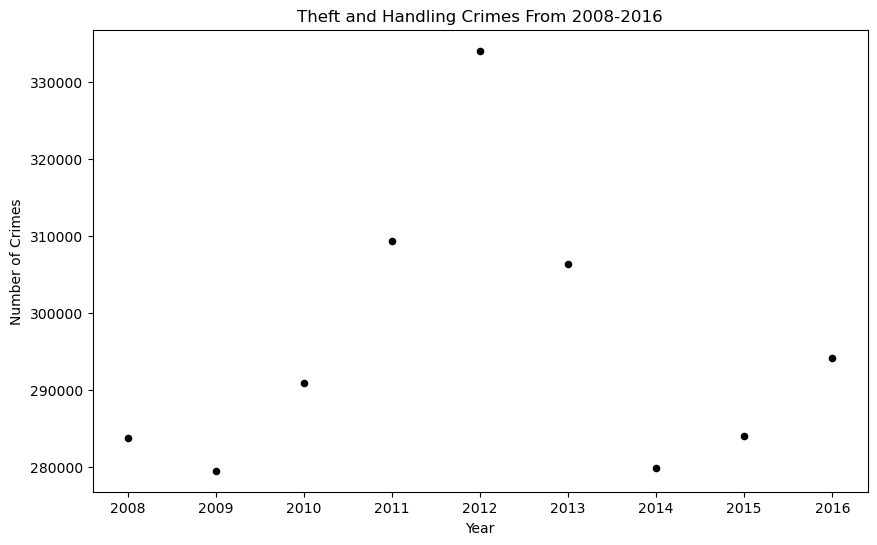

In [64]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Theft and Handling', figsize=(10,6),color='black')
plt.title('Theft and Handling Crimes From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat betapa peningkatan yang sangat drasti pada tahun 2009-2012, dan ppenurunan drastis 2012-2014, akan tetapi angka itu meningkat lagi hingga tahun 2016

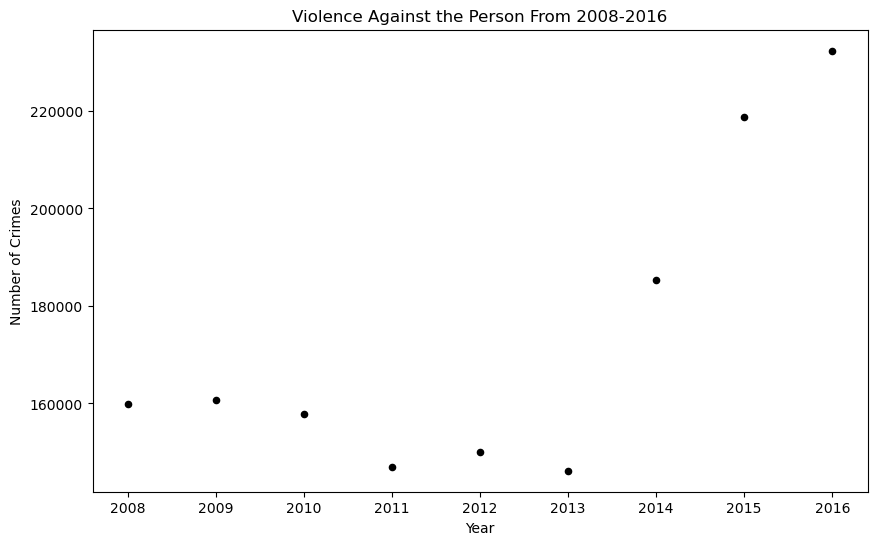

In [65]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Violence Against the Person', figsize=(10,6),color='black')
plt.title('Violence Against the Person From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat betapa peningkatan yang sangat drasti pada tahun 2013-2016

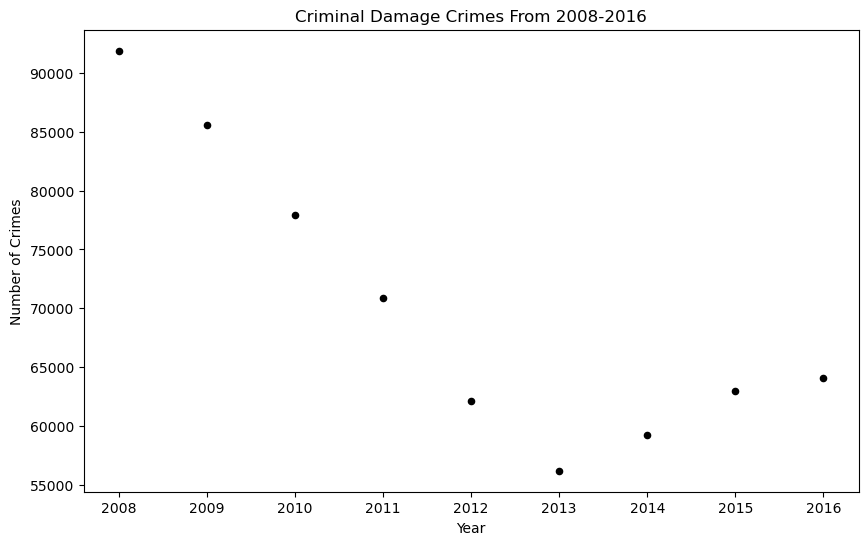

In [66]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Criminal Damage', figsize=(10,6),color='black')
plt.title('Criminal Damage Crimes From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat betapa penurunan drastis pada whun 2008-2012

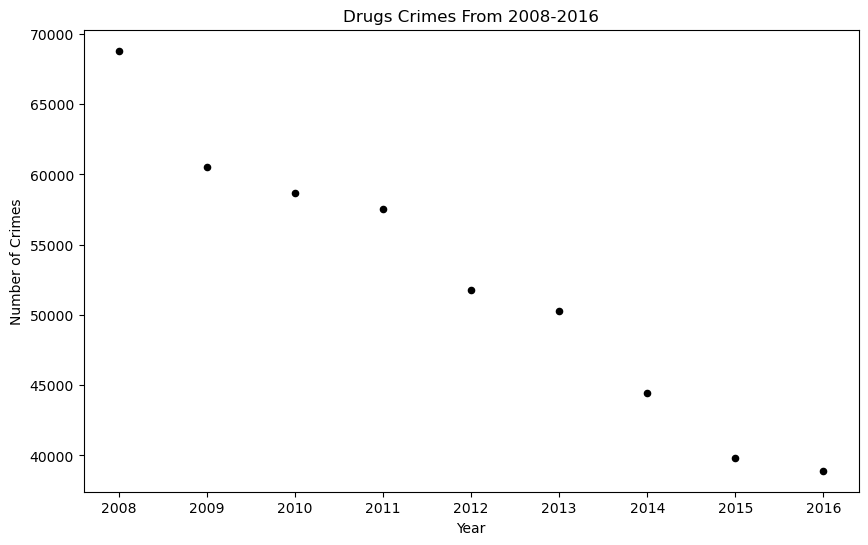

In [67]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Drugs', figsize=(10,6),color='black')
plt.title('Drugs Crimes From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat Drugs mengalami penurunan yang bisa dibilang konsiten dibanding dengan kenaikannya

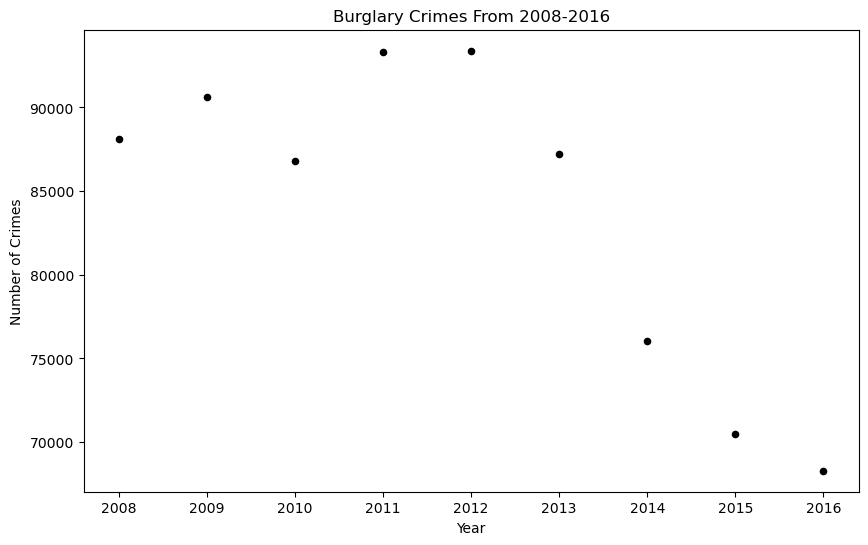

In [68]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Burglary', figsize=(10,6),color='black')
plt.title('Burglary Crimes From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat Bulglary , hanya mengalami peningkatan pada tahun 2010, dan mengalami penurnan yang baik pada tahun 2011

In [69]:
TaH = (scater_plot['Theft and Handling']-scater_plot['Theft and Handling'].min()) / (scater_plot['Theft and Handling'].max() - scater_plot['Theft and Handling'].min())

vA = (scater_plot['Violence Against the Person']-scater_plot['Violence Against the Person'].min()) / (scater_plot['Violence Against the Person'].max() - scater_plot['Violence Against the Person'].min())

cd = (scater_plot['Criminal Damage']-scater_plot['Criminal Damage'].min()) / (scater_plot['Criminal Damage'].max() - scater_plot['Criminal Damage'].min())

dr = (scater_plot['Drugs']-scater_plot['Drugs'].min()) / (scater_plot['Drugs'].max() - scater_plot['Drugs'].min())

bG = (scater_plot['Burglary']-scater_plot['Burglary'].min()) / (scater_plot['Burglary'].max() - scater_plot['Burglary'].min())

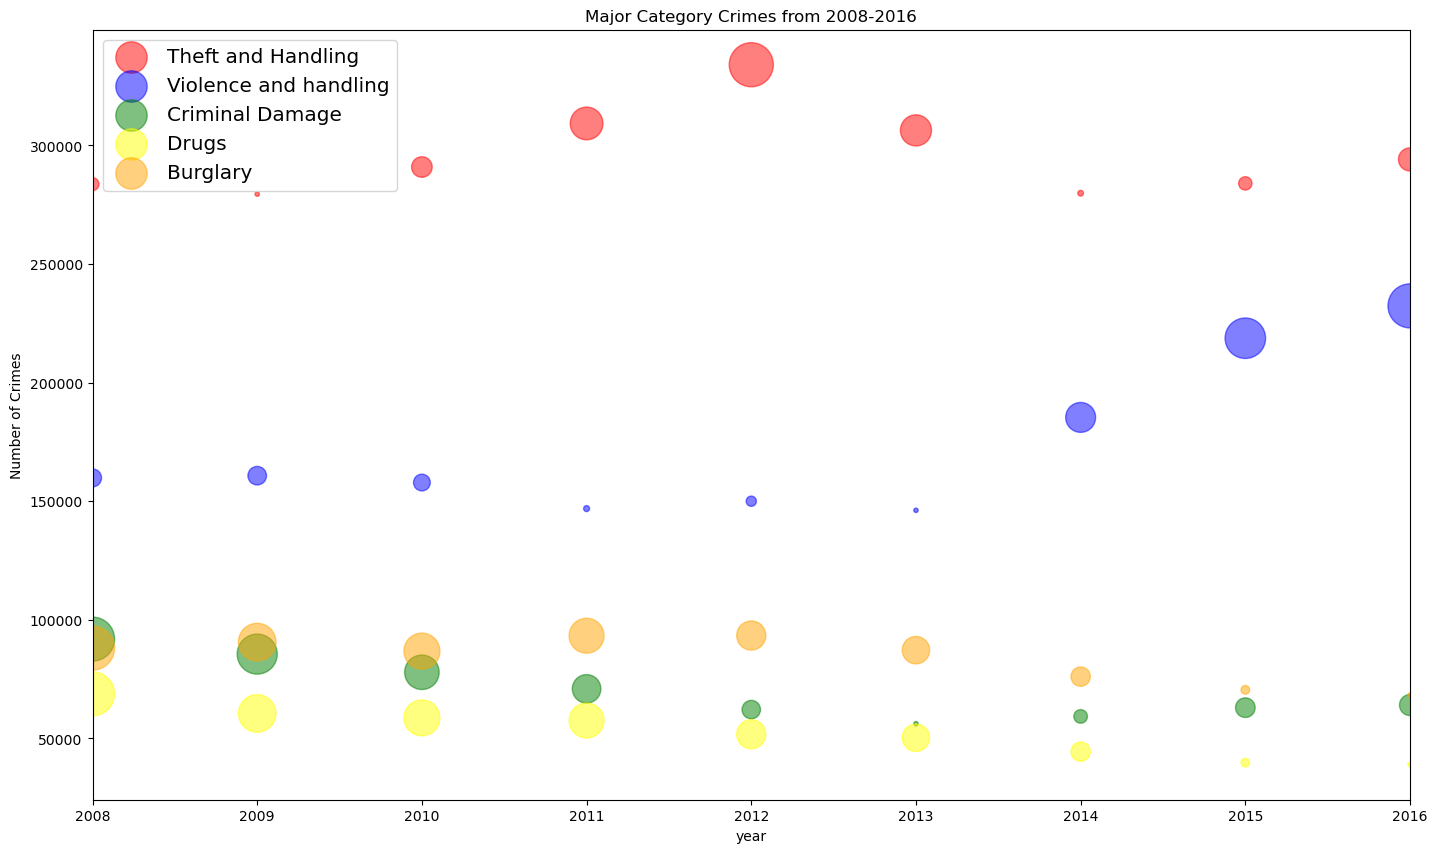

In [70]:
x0 =  scater_plot.plot(kind='scatter', x='year', y='Theft and Handling', figsize=(17, 10), alpha=0.5, color="red", s=TaH* 1000 +10, xlim=(2008,2016))

x1 =  scater_plot.plot(kind='scatter', x='year', y='Violence Against the Person', alpha=0.5, color="blue", s=vA * 1000 +10, ax = x0)

x2 =  scater_plot.plot(kind='scatter', x='year', y='Criminal Damage', alpha=0.5, color="green", s=cd * 1000 +10, ax = x0)

x3 =  scater_plot.plot(kind='scatter', x='year', y='Drugs', alpha=0.5, color="yellow", s=dr * 1000 +10, ax = x0)

x4 =  scater_plot.plot(kind='scatter', x='year', y='Burglary', alpha=0.5, color="orange", s=dr * 1000 +10, ax = x0)


x0.set_ylabel('Number of Crimes')
x0.set_title('Major Category Crimes from 2008-2016')
x0.legend(['Theft and Handling','Violence and handling', 'Criminal Damage','Drugs','Burglary'], 
loc='upper left', fontsize='x-large')

*Keterangan Scatter*

Bisa kita lihat disini Theft and handling mempunyai frekuensi tertinggi pada tahun 2012 dan meningkat secara dratis serta angka kriminalnya paling besar dari lainnya.

Di urutan kedua ada Violence and handling mengalami penurunan diawal lalu mengalami peningkatan yang sangat drastis pada tahun 2013-2016

Untuk 3 jenis lainnya, menglami kenaikan dan penurunan yang bisa dibilang tidak terlalu melunjak

## Daerah Yang harus ditangani

### Folium 

In [71]:
#London Lat and Lon
latitude= 51.5085300 #garis lintang
longitude= -0.1257400 #garis bujur

In [72]:
london = folium.Map(location=[latitude,longitude],zoom_start=12)
london

In [73]:
# Mengganti Tipe Peta
london1 = folium.Map(location=[51.5085300,-0.1257400],zoom_start=11,tiles='Stamen Toner')
london1

In [74]:
# Menampilkan Area Theft and handling Westminster
westminster = folium.Map(location=[51.494720, -0.135278],zoom_start=12,tiles='Stamen Terrain')
westminster

In [75]:
# Menampilkan Area Crodyon
Crodyon = folium.Map(location=[51.376495, -0.100594],zoom_start=14,tiles='Stamen Terrain')
Crodyon

In [76]:
# Menampilkan Area Lambeth
Lambeth = folium.Map(location=[51.49635, -0.11152],zoom_start=15,tiles='Stamen Terrain')
Lambeth

In [77]:
# Menampilkan Area barnet
barnet = folium.Map(location=[51.625150, -0.152936],zoom_start=13,tiles='Stamen Terrain')
barnet

# Kesimpulan 

Berdasarkan data dari *London Crime Data 2008-2016*, terdapat 33 daerah, 9 kategori kejahatan besar *(major_category)*, dan 32 kejahatan kecil *(minor_category)*.

Untuk hasil dari analisa yang saya dapatkan:
1. Untuk 5 kejahatan terbesar dalah kategori *major_category* sepanjang 2008-2016 diantaranya :
   1. Theft and Handling dengan jumlah kasus 307992 kasus
   2. Violence Against the Person dengan jumlah kasus    247061 kasus
   3. Criminal Damage dengan jumlah kasus                159997 kasus
   4. Drugs dengan jumlah kasus                      92169 kasus
   5. Burglary dengan jumlah kasus                      81064 kasus
   
   
2. Daerah dengan angka kriminalitas kejahatan besar beberapa jenis tertinggi tahun 2016 :
    1. Theft and handling 
          1. *Westminster* jumlah kasus sebesar 27.520 kasus kriminal (34.5 %)
          2. *Camden*      jumlah kasus sebesar 14.088 kasus kriminal (17.7 %)
          3. *Lambeth*     jumlah kasus sebesar 13.155 kasus kriminal (16.5 %)
          4. *Southwark*   jumlah kasus sebesar 12.946 kasus kriminal (16.2 %)
          5. *Islington*      jumlah kasus sebesar 12077 kasus kriminal  (15.1 %)
          
    2. Violence Against the Person
        1. *Westminster*     jumlah kasus sebesar 10.834 kasus kriminal (21.3 %)
        2. *Lambeth*        jumlah kasus sebesar 10.496 kasus kriminal (20.6 %)
        3. *Croydon*        jumlah kasus sebesar 10.302 kasus kriminal (20.2 %)
        4. *NewHam*       jumlah kasus sebesar 9.646 kasus kriminal (19.0 %)
        5. *Tower Hamlets*         jumlah kasus sebesar 9.608 kasus kriminal (18.9 %)
        
    3. Criminal Damage
        1. *Croydon*        jumlah kasus sebesar 3.219 kasus kriminal (23.6 %)
        2. *Lambeth*         jumlah kasus sebesar 2.764 kasus kriminal (20.2 %)
        3. *Southwark*      jumlah kasus sebesar 2.621 kasus kriminal (19.2 %)
        4. *Ealing*         jumlah kasus sebesar 2.562 kasus kriminal (18.38%)
        5. *Newham*    jumlah kasus sebesar 2.496 kasus kriminal (18.3 %)
      
    4. Drugs
        1. *Lambeth*       jumlah kasus sebesar 2.738 kasus kriminal (26.1 %)
        2. *Brent*        jumlah kasus sebesar 2.096 kasus kriminal (20.0 %)
        3. Westminster    jumlah kasus sebesar 2.049 kasus kriminal (19.5 %)
        4. *SouthWark*      jumlah kasus sebesar 1.838 kasus kriminal (17.5 %)
        5. *Islington*         jumlah kasus sebesar 1.777 kasus kriminal (16.9 %)
    
    5. Bulglary
       1. *Barnet*           jumlah kasus sebesar 3.402 kasus kriminal (22.0 %)
       2. *Westminster*          jumlah kasus sebesar 3.218 kasus kriminal (20.8 %)
       3. *Lambeth*        jumlah kasus sebesar 3.087 kasus kriminal (20.0 %)
       4. *South Wark*    jumlah kasus sebesar 2.946 kasus kriminal (19.1 %)
       5. *Tower Hamlets*       jumlah kasus sebesar 2.794 kasus kriminal (18.1 %)

3. Tingkat Frekuensi kejahatan yang sering muncul adalah Theft and Handling yaitu pada tahun 2012 yang bisa dibilang sangat tinggi dibandingkan dengan kategori kejahatan besar lainnya


4. Dari semua hasil kesimpulan diatas, maka bisa diambil keputusan untuk daerah yang perlu ditekan angka kriminalitasnya pada tahun berikutnya antara lain :
   1. Westminster dengan kasus Theft and Handling dan Voilence the person
   2. Croydon dengan kasus Criminal Damage
   3. Lambeth dengan kasus Drugs
   4. Barnet dengan kasus Bulglary

SEKIAN LAPORAN DARI SAYA TERIMAKASIH